Importing Important libraries

In [31]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE,SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
import os

Feature Selection

Loaded scaled_data shape: (297, 20)
Loaded y shape: (297, 1)
scaled data :         age  trestbps      chol   thalach   oldpeak  sex_1  cp_2  cp_3  cp_4  \
0  0.708333  0.481132  0.244292  0.603053  0.370968      1     0     0     0   
1  0.791667  0.622642  0.365297  0.282443  0.241935      1     0     0     1   
2  0.791667  0.245283  0.235160  0.442748  0.419355      1     0     0     1   
3  0.166667  0.339623  0.283105  0.885496  0.564516      1     0     1     0   
4  0.250000  0.339623  0.178082  0.770992  0.225806      0     1     0     0   

   fbs_1  restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1.0  ca_2.0  \
0      1          0          1        0        0        1       0       0   
1      0          0          1        1        1        0       0       0   
2      0          0          1        1        1        0       0       1   
3      0          0          0        0        0        1       0       0   
4      0          0          1        0        0        0  

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

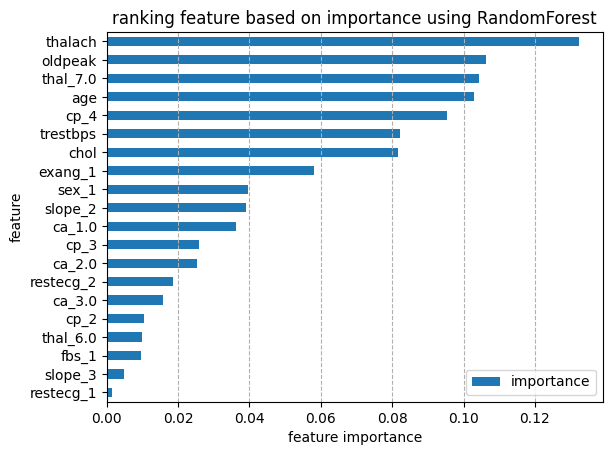

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionW


Features Selected by RFE (Top 10):
     Feature  RFE Selected  RFE Rank
0        age          True         1
1   trestbps          True         1
2       chol          True         1
3    thalach          True         1
4    oldpeak          True         1
5      sex_1          True         1
12   exang_1          True         1
8       cp_4          True         1
13   slope_2          True         1
19  thal_7.0          True         1

Full RFE Ranking:
      Feature  RFE Selected  RFE Rank
0         age          True         1
1    trestbps          True         1
2        chol          True         1
3     thalach          True         1
4     oldpeak          True         1
5       sex_1          True         1
12    exang_1          True         1
8        cp_4          True         1
13    slope_2          True         1
19   thal_7.0          True         1
15     ca_1.0         False         2
7        cp_3         False         3
16     ca_2.0         False         4
11  re

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [32]:
#returning sample data
#%store -r scaled_data_pca_df
#%store -r y
input_data_path = '../data_through_notes/' # Relative path to data folder from notebooks folder
#scaled_data_pca_df = pd.read_csv(os.path.join(input_data_path, 'scaled_data_pca_df.csv'))
y = pd.read_csv(os.path.join(input_data_path, 'y_processed.csv'))
scaled_data=pd.read_csv(os.path.join(input_data_path,'scaled_data.csv'))
y_processed=y.iloc[:,0]
print("Loaded scaled_data shape:", scaled_data.shape)
print("Loaded y shape:", y.shape)
print(f'scaled data : {scaled_data.head()}')



#-------feature reduction using random forest------
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(scaled_data,y)
importances=rf.feature_importances_
feature_importance_rf=pd.DataFrame({
    'feature' : scaled_data.columns,
    'importance' : importances
}).sort_values(by='importance',ascending=False)
print(f'feature Importance using RF :  \n {feature_importance_rf}')

#plot Feature Importance using RF
plt.figure(figsize=(15,15))
feature_importance_rf.sort_values(by='importance',ascending=True).plot(kind='barh',x='feature',y='importance')
plt.xlabel('feature importance')
plt.title('ranking feature based on importance using RandomForest')
plt.grid(axis='x',linestyle='--')
plt.show()

# Store the sorted feature names for later use
ranked_features_rf = feature_importance_rf['feature'].tolist()


#------recursive feature elimination------
estimator_rfe=RandomForestClassifier(n_estimators=100,random_state=42) 
n_features_to_select_rfe=10
rfe=RFE(estimator=estimator_rfe,n_features_to_select=n_features_to_select_rfe,step=1)
rfe.fit(scaled_data,y)
#print(rfe.support_)
#print(rfe.ranking_)
rfe_results = pd.DataFrame({
    "Feature": scaled_data.columns,
    "RFE Selected": rfe.support_,
    "RFE Rank": rfe.ranking_
})
rfe_results_df=rfe_results.sort_values(by='RFE Rank',ascending=True)
print(f"\nFeatures Selected by RFE (Top {n_features_to_select_rfe}):")
print(rfe_results_df[rfe_results_df['RFE Selected']])

print("\nFull RFE Ranking:")
print(rfe_results_df)

# Store the selected features by RFE
selected_features_rfe_list = scaled_data.columns[rfe.support_].tolist()




#------Chi-square Test------
original_categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
chi_square_features = []
for col in scaled_data.columns:
    # Check if the column name contains part of the original categorical names + '_'
    # This is a heuristic, better would be to store encoded column names from step 3 in preprocessing
    # For now, let's select based on our knowledge of the encoded columns structure
    if any(orig_col in col for orig_col in original_categorical_cols) or col in original_categorical_cols:
        # Exclude original numerical columns that might contain categorical names
        # Make sure they are binary/categorical, not continuous numerical.
        # After one-hot encoding, these columns should be binary (0 or 1)
        if scaled_data[col].nunique() <= scaled_data.shape[0] * 0.1: # Heuristic for potentially categorical if many unique vals
             # Better check if the column name implies it's an encoded feature
            if '_' in col and col.split('_')[0] in original_categorical_cols:
                chi_square_features.append(col)
            elif col in ['sex_1', 'fbs_1', 'exang_1']: # Specific binary encoded original features
                chi_square_features.append(col)
#combining all the results of RF , RFE, Chi2 test
# Let's manually define the actual encoded categorical columns based on previous output
# These are columns that were *created* by one-hot encoding.
# We need to ensure we don't include original numerical columns.
# A more robust way would be to get them from X_encoded.columns minus true_numerical_cols
encoded_categorical_cols_for_chi2 = [
    'sex_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_1', 'restecg_1', 'restecg_2',
    'exang_1', 'slope_2', 'slope_3', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0'
]

# Ensure these columns actually exist in X_processed
encoded_categorical_cols_for_chi2 = [col for col in encoded_categorical_cols_for_chi2 if col in scaled_data.columns]

print(f"\nCategorical columns for Chi-Square Test: {encoded_categorical_cols_for_chi2}")

# Apply Chi-Square Test
# SelectKBest selects features based on the k highest scores.
# chi2 is the scoring function for categorical features.
# We will get scores for all identified categorical features.
chi2_selector = SelectKBest(chi2, k='all') # k='all' to get scores for all features

# Fit the selector
chi2_selector.fit(scaled_data[encoded_categorical_cols_for_chi2], y_processed)

# Get scores and p-values
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

# Create a DataFrame for Chi-Square results
chi2_results_df = pd.DataFrame({
    'Feature': encoded_categorical_cols_for_chi2,
    'Chi2_Score': chi2_scores,
    'P_Value': chi2_pvalues
})

# Sort by Chi2_Score in descending order (higher score means stronger relationship)
chi2_results_df = chi2_results_df.sort_values(by='Chi2_Score', ascending=False)

print("\nChi-Square Test Results:")
print(chi2_results_df)

# Interpret p-values: A low p-value (e.g., < 0.05) indicates a significant relationship.
print("\nFeatures with P-Value < 0.05 (Statistically Significant):")
print(chi2_results_df[chi2_results_df['P_Value'] < 0.05])

# Store significant features for later use
significant_chi2_features = chi2_results_df[chi2_results_df['P_Value'] < 0.05]['Feature'].tolist()



#------Selecting only the most relavent features------
top_num_rf_features=12
final_selected_features=feature_importance_rf['feature'].head(top_num_rf_features).tolist()
reduced_df=scaled_data[final_selected_features]
print('\n first 5 rows in the reduced Data after feature selection:')
print(reduced_df.head())
print(f"Shape of reduced data: {reduced_df.shape}")

#------Save the selected features dataframe------
output_data_path = '../data_through_notes/' # Relative path to data folder from notebooks folder
os.makedirs(output_data_path, exist_ok=True)

reduced_df.to_csv(os.path.join(output_data_path, 'reduced_data.csv'), index=False)

print(f"\n Reduced_data saved to: {os.path.join(output_data_path, 'reduced_data.csv')}")

#%store reduced_df
#%store y